# IE6400 - Project 1 : MIMIC-III Clinical Database

### By Aditya Rajendra Shanbhag - MS Data Analytics Engineering

## Step 1 : Installing and importing all important libraries

i) Setting up working directory in Google Colab

In [50]:
from google.colab import drive
drive.mount('/content/drive')

# Set working directory
%cd /content/drive/MyDrive/IE6400_Project1_submission

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IE6400_Project1_submission


ii) Installing required packages

In [51]:
! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn
! pip install dask
! pip install dask-ml

iii) Import all the required libraries

In [52]:
import dask.dataframe as DaskDD
import matplotlib.pyplot as plt
import seaborn as sns
from dask_ml.preprocessing import LabelEncoder
from dask_ml.preprocessing import StandardScaler
from scipy.stats import zscore
import numpy as np

## Step 2 : Import the datasets

i) Import Demographic Data

In [53]:
demographic_data = DaskDD.read_csv("mimic_data/DEMOGRAPHIC_DATA/DEMO_DATA.csv",delimiter="\t").iloc[:, 1:]

ii) Import Lab Test Data

In [54]:
albumin_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/ALBUMIN.csv",delimiter="\t").iloc[:, 1:]
bicarbonate_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/BICARBONATE.csv",delimiter="\t").iloc[:, 1:]
blood_glucose_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/BLOOD_GLUCOSE.csv",delimiter="\t").iloc[:, 1:]
blood_urea_nitrogen_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/BLOOD_UREA_NITROGEN.csv",delimiter="\t").iloc[:, 1:]
creatinine_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/CREATININE.csv",delimiter="\t").iloc[:, 1:]
hematrocrit_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/HEMATROCRIT.csv",delimiter="\t").iloc[:, 1:]
platelet_count_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/PLATELET_COUNT.csv",delimiter="\t").iloc[:, 1:]
potasssium_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/POTASSSIUM.csv",delimiter="\t").iloc[:, 1:]
sodium_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/SODIUM.csv",delimiter="\t").iloc[:, 1:]
white_blood_cells_lab_data = DaskDD.read_csv("mimic_data/LAB_DATA/WHITE_BLOOD_CELLS.csv",delimiter="\t").iloc[:, 1:]

iii) Import Vital Signs Data

In [55]:
heart_rate_vital_data = DaskDD.read_csv("mimic_data/PHYSIO_DATA/HR.csv",delimiter="\t").iloc[:, 1:]
respiratory_rate_vital_data = DaskDD.read_csv("mimic_data/PHYSIO_DATA/RESP_RATE.csv",delimiter="\t").iloc[:, 1:]
systolic_pressure_vital_data = DaskDD.read_csv("mimic_data/PHYSIO_DATA/SYS_PRESS.csv",delimiter="\t").iloc[:, 1:]
diastolic_pressure_vital_data = DaskDD.read_csv("mimic_data/PHYSIO_DATA/DIAS_PRESS.csv",delimiter="\t").iloc[:, 1:]
temperature_vital_data = DaskDD.read_csv("mimic_data/PHYSIO_DATA/TEMP.csv",delimiter="\t").iloc[:, 1:]
oxygen_saturation_vital_data = DaskDD.read_csv("mimic_data/PHYSIO_DATA/SPO2.csv",delimiter="\t").iloc[:, 1:]

**NOTE:**  In the LAB TEST DATA dataset, hadm_id has a data type of float64, whereas in the other datasets, it has data type as int64. Additionally, a null value was present in hadm_id within LAB TEST DATA, so I have dropped the null row.

In [56]:
albumin_lab_data = albumin_lab_data.dropna(subset=['hadm_id'])
albumin_lab_data['hadm_id'] = albumin_lab_data['hadm_id'].astype('int64')
bicarbonate_lab_data = bicarbonate_lab_data.dropna(subset=['hadm_id'])
bicarbonate_lab_data['hadm_id'] = bicarbonate_lab_data['hadm_id'].astype('int64')
blood_glucose_lab_data = blood_glucose_lab_data.dropna(subset=['hadm_id'])
blood_glucose_lab_data['hadm_id'] = blood_glucose_lab_data['hadm_id'].astype('int64')
blood_urea_nitrogen_lab_data = blood_urea_nitrogen_lab_data.dropna(subset=['hadm_id'])
blood_urea_nitrogen_lab_data['hadm_id'] = blood_urea_nitrogen_lab_data['hadm_id'].astype('int64')
creatinine_lab_data = creatinine_lab_data.dropna(subset=['hadm_id'])
creatinine_lab_data['hadm_id'] = creatinine_lab_data['hadm_id'].astype('int64')
hematrocrit_lab_data = hematrocrit_lab_data.dropna(subset=['hadm_id'])
hematrocrit_lab_data['hadm_id'] = hematrocrit_lab_data['hadm_id'].astype('int64')
platelet_count_lab_data = platelet_count_lab_data.dropna(subset=['hadm_id'])
platelet_count_lab_data['hadm_id'] = platelet_count_lab_data['hadm_id'].astype('int64')
potasssium_lab_data = potasssium_lab_data.dropna(subset=['hadm_id'])
potasssium_lab_data['hadm_id'] = potasssium_lab_data['hadm_id'].astype('int64')
sodium_lab_data = sodium_lab_data.dropna(subset=['hadm_id'])
sodium_lab_data['hadm_id'] = sodium_lab_data['hadm_id'].astype('int64')
white_blood_cells_lab_data = white_blood_cells_lab_data.dropna(subset=['hadm_id'])
white_blood_cells_lab_data['hadm_id'] = white_blood_cells_lab_data['hadm_id'].astype('int64')

iv) Merging all the imported data into a single Dask Dataframe

In [57]:
all_list = [albumin_lab_data, bicarbonate_lab_data, blood_glucose_lab_data, blood_urea_nitrogen_lab_data, creatinine_lab_data, hematrocrit_lab_data, platelet_count_lab_data, potasssium_lab_data, sodium_lab_data, white_blood_cells_lab_data, heart_rate_vital_data, respiratory_rate_vital_data, systolic_pressure_vital_data, diastolic_pressure_vital_data, temperature_vital_data, oxygen_saturation_vital_data]

final_patient_df = demographic_data

for datasets in all_list:
    final_patient_df = final_patient_df.merge(datasets, on='hadm_id', how='left')


**FINAL MERGED DATASET using DASK**

In [58]:
final_patient_df.head()

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_albumin,std_albumin,avg_bicarbonate,std_bicarbonate,...,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_temp,std_temp,avg_spo2,std_spo2
0,165315,64.971282,F,MARRIED,NONE,WHITE,NaN,NaN,27.500000,0.707107,...,20.000000,2.000000,141.538462,11.065076,74.307692,8.882423,NaN,NaN,98.125000,1.360147
1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE,NaN,NaN,24.000000,2.645751,...,17.714286,5.384194,101.340909,13.059690,56.613636,6.651511,37.21,0.529051,97.906977,2.147135
2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,4.1,NaN,27.250000,1.669046,...,17.114286,2.741526,122.180000,22.562105,64.860000,15.398131,NaN,NaN,98.114286,1.529541
3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE,NaN,NaN,24.000000,1.632993,...,15.076923,1.382120,122.937500,11.404495,74.625000,10.346497,NaN,NaN,98.538462,1.050031
4,129635,58.989281,M,MARRIED,NONE,WHITE,3.2,NaN,24.333333,2.500000,...,17.965116,4.564435,115.065934,24.737647,50.571429,10.242767,NaN,NaN,96.373494,2.341101


## Step 3: Data Exploration

i) To check the number of Rows and Columns of the final dataframe

In [59]:
print("Number of Rows : ", final_patient_df.shape[0].compute())
print("Number of Columns : ", final_patient_df.shape[1])

Number of Rows :  58976
Number of Columns :  38


ii) Checking Dataframe information

In [60]:
final_patient_df.info()

<class 'dask.dataframe.dask_expr.DataFrame'>
Columns: 38 entries, hadm_id to std_spo2
dtypes: float64(33), int64(1), string(4)

iii) Describing a dataframe

In [61]:
final_patient_df.describe().compute()

,hadm_id,age,avg_albumin,std_albumin,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,avg_blood_urea_nitrogen,std_blood_urea_nitrogen,...,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_temp,std_temp,avg_spo2,std_spo2
count,58976.000000,58976.000000,30996.000000,16269.000000,52825.000000,50573.000000,50653.000000,49488.000000,51008.000000,49599.000000,...,56669.000000,54749.000000,49035.000000,49016.000000,49035.000000,49016.000000,5987.000000,5649.000000,49001.000000,48958.000000
mean,149970.809584,55.189864,3.180720,0.322284,25.158703,2.686833,133.275265,38.131553,25.134093,6.637952,...,23.304075,8.620684,120.765523,17.911410,61.658084,18.128165,35.143491,0.657427,98.219337,18.014138
std,28883.095213,27.316531,0.661693,0.236153,3.925461,1.322915,41.024924,38.531660,18.272963,6.666068,...,73.564236,863.227782,28.061710,164.456130,25.432458,204.247150,8.247789,0.751722,225.469976,2191.046335
min,100001.000000,0.000000,1.000000,0.000000,6.000000,0.000000,11.000000,0.000000,1.421053,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124952.750000,43.518463,2.700000,0.148324,23.000000,1.760682,109.666667,18.256762,13.333333,2.643965,...,16.857143,3.160570,108.914791,11.609195,53.846042,7.956679,36.703452,0.406940,96.031250,1.541687
50%,149989.500000,61.800390,3.200000,0.282843,25.230769,2.507133,124.222222,27.792665,19.200000,4.391912,...,19.348837,4.093154,118.818182,14.973800,60.074074,9.948115,37.061364,0.575270,97.190476,2.017443
75%,174966.500000,75.938302,3.650000,0.427200,27.250000,3.393206,144.875000,43.913686,30.615385,8.022562,...,23.056075,5.585988,130.893797,19.156357,67.234025,12.354709,37.400000,0.767901,98.200000,2.616786
max,199999.000000,91.400000,5.700000,2.050610,52.000000,19.091883,798.000000,760.331429,232.040000,105.561763,...,17340.522059,201985.424363,3122.468936,20570.481318,2365.267000,12612.494253,40.564864,26.587214,48397.260870,401275.132540


iv) Checking Data type of each columns

In [62]:
final_patient_df.dtypes

,0
hadm_id,int64
age,float64
gender,string[pyarrow]
marital_status,string[pyarrow]
religion,string[pyarrow]
ethnicity,string[pyarrow]
avg_albumin,float64
std_albumin,float64
avg_bicarbonate,float64
std_bicarbonate,float64


 v) Understand data distribution and potential issues

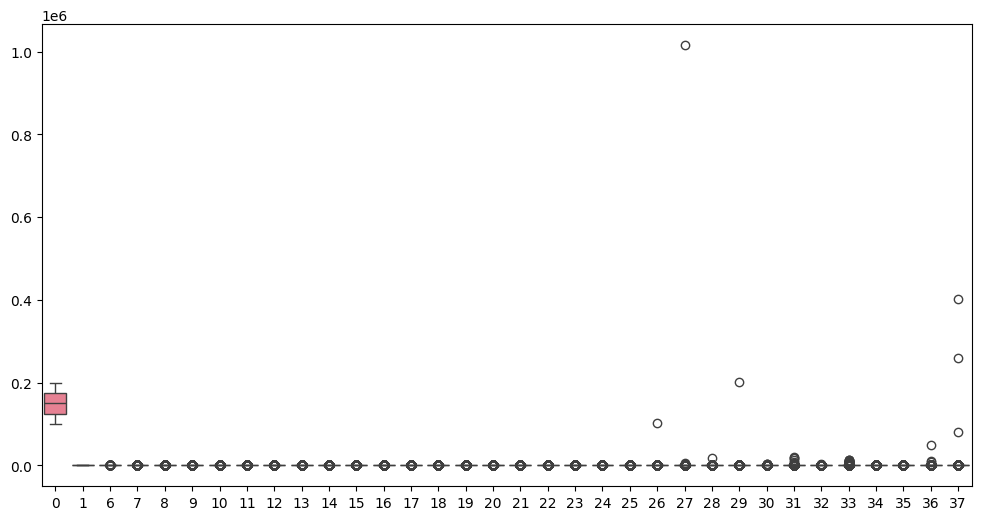

In [63]:
# To represent box plot of all numerical columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_patient_df)
plt.show()

We can see some outliers in the above Boxplot have outliers

Check null values

In [64]:
final_patient_df.compute().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hadm_id                  58976 non-null  int64  
 1   age                      58976 non-null  float64
 2   gender                   58976 non-null  string 
 3   marital_status           58976 non-null  string 
 4   religion                 58976 non-null  string 
 5   ethnicity                58976 non-null  string 
 6   avg_albumin              30996 non-null  float64
 7   std_albumin              16269 non-null  float64
 8   avg_bicarbonate          52825 non-null  float64
 9   std_bicarbonate          50573 non-null  float64
 10  avg_blood_glucose        50653 non-null  float64
 11  std_blood_glucose        49488 non-null  float64
 12  avg_blood_urea_nitrogen  51008 non-null  float64
 13  std_blood_urea_nitrogen  49599 non-null  float64
 14  avg_creatinine        

## Step 4 : Data Cleaning and Pre-processing

### **I) COLUMN NULL HANDLING**

i) To Check the Null percentage of Columns - to determine which column need to be dropped

In [65]:
column_null_percentage = (final_patient_df.isnull().sum() / len(final_patient_df)) * 100

# Finding Top 10 column null percentages
column_null_percentage.compute().sort_values(ascending=False).head(10)

,0
std_temp,90.421527
avg_temp,89.848413
std_albumin,72.414202
avg_albumin,47.443028
std_spo2,16.986571
avg_spo2,16.913660
std_dias_press,16.888226
std_sys_press,16.888226
avg_dias_press,16.856009
avg_sys_press,16.856009


Based on the above result, we can see that **std_temp, avg_temp, std_albumin and avg_albumin columns** have highest percentage of null percentage **(more than 45%)**, so i have decided to drop the columns.

ii) Dropping Null Columns

In [66]:
final_patient_df = final_patient_df.drop(['avg_albumin', 'std_albumin', 'avg_temp', 'std_temp'], axis=1)
final_patient_df.compute()

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,...,avg_hr,std_hr,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,165315,64.971282,F,MARRIED,NONE,WHITE,27.500000,0.707107,105.000000,4.242641,...,101.875000,11.242034,20.000000,2.000000,141.538462,11.065076,74.307692,8.882423,98.125000,1.360147
1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE,24.000000,2.645751,116.846154,15.448010,...,90.139535,6.638923,17.714286,5.384194,101.340909,13.059690,56.613636,6.651511,97.906977,2.147135
2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,27.250000,1.669046,134.600000,15.833860,...,76.694444,9.183275,17.114286,2.741526,122.180000,22.562105,64.860000,15.398131,98.114286,1.529541
3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE,24.000000,1.632993,117.000000,23.452079,...,67.923077,5.203549,15.076923,1.382120,122.937500,11.404495,74.625000,10.346497,98.538462,1.050031
4,129635,58.989281,M,MARRIED,NONE,WHITE,24.333333,2.500000,209.555556,104.623266,...,76.321839,9.592262,17.965116,4.564435,115.065934,24.737647,50.571429,10.242767,96.373494,2.341101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,191113,19.413381,F,SINGLE,NONE,WHITE,21.600000,4.669047,81.333333,14.137421,...,89.318182,16.415400,18.772727,2.893866,113.850000,12.465848,57.250000,9.175912,99.454545,1.503243
58972,101071,83.509132,F,WIDOWED,CHRISTIAN,WHITE,NaN,NaN,258.000000,NaN,...,85.461538,4.611858,24.000000,3.439961,152.538462,11.132650,80.384615,6.331646,95.846154,1.951331
58973,122631,42.559732,M,MARRIED,NONE,WHITE,26.666667,2.943920,121.500000,11.351526,...,113.979167,6.883497,24.375000,6.058667,146.500000,16.244622,83.420000,9.028504,94.000000,2.259731
58974,170407,60.808503,F,MARRIED,CHRISTIAN,WHITE,24.923077,1.552500,131.071429,20.719609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **II) ROW NULL HANDLING**

In [67]:
row_null_percentage = (final_patient_df.isnull().sum(axis=1) / final_patient_df.shape[1]) * 100
row_null_percentage.compute()

,0
0,8.823529
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
58971,0.000000
58972,35.294118
58973,0.000000
58974,29.411765


I have decided to drop the rows containing null values more than 40%

In [68]:
# Check for missing row count and define threshold
missing_counts_row = final_patient_df.isnull().sum(axis=1)
threshold = int(final_patient_df.shape[1] * 0.4)

# Filter rows based on threshold condition
final_patient_df = final_patient_df[missing_counts_row <= threshold]

Check for outliers after dropping few column

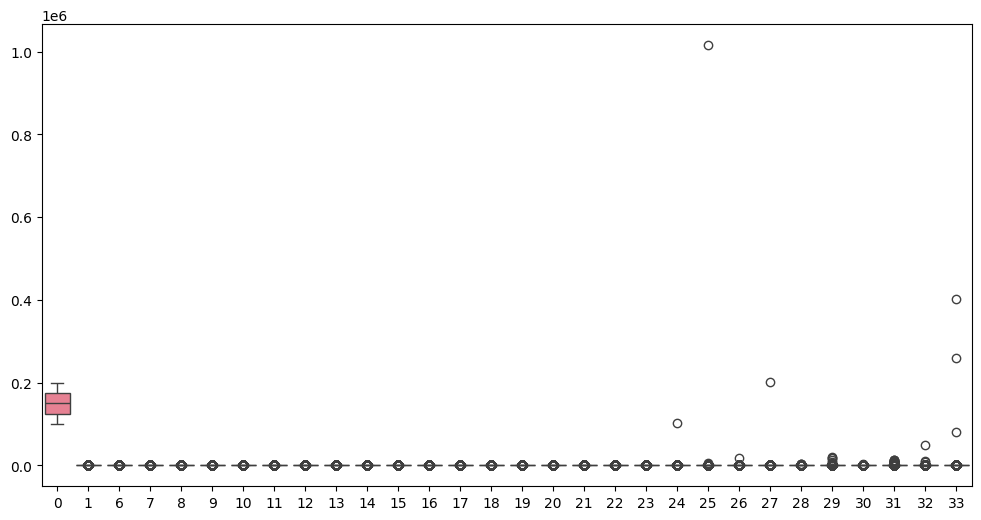

In [69]:
# Outlier plot using seaborn

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_patient_df)
plt.show()

To handle the remaining missing value, we check the skewness of each column, to determine which computation to be used for imputing Missing Values

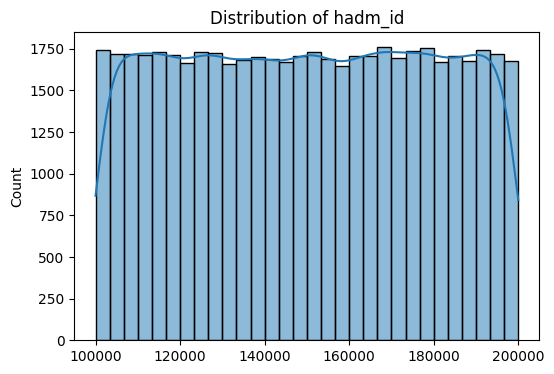

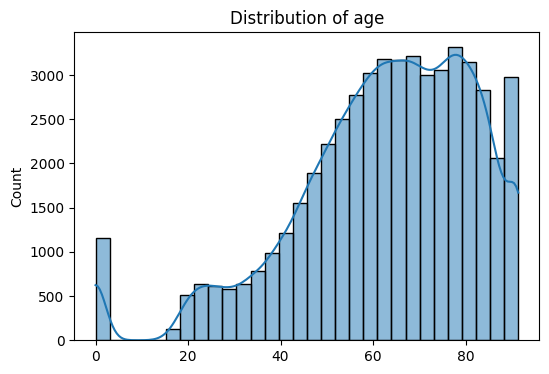

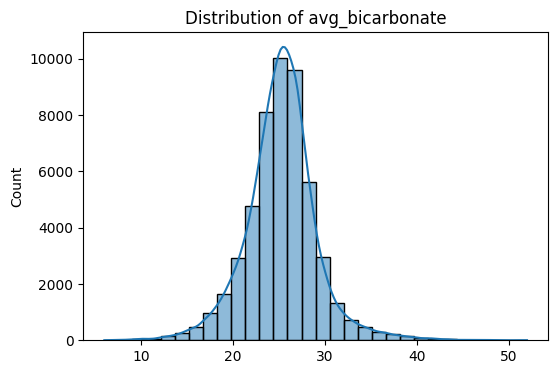

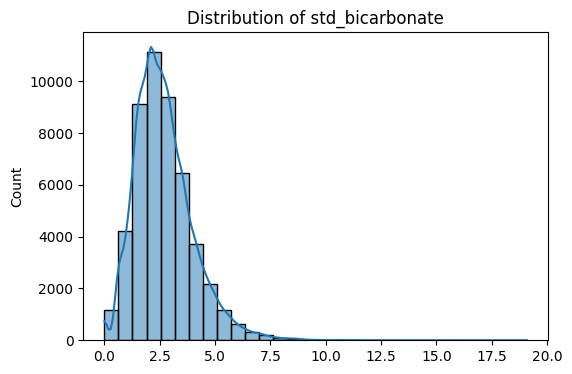

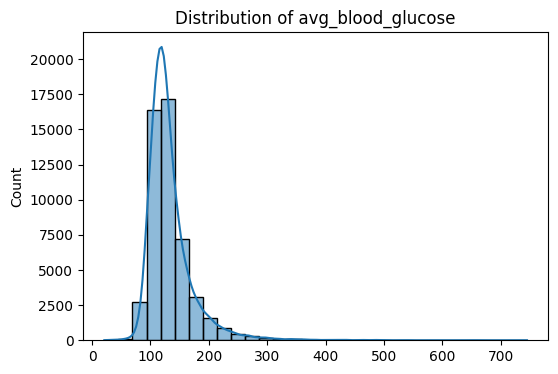

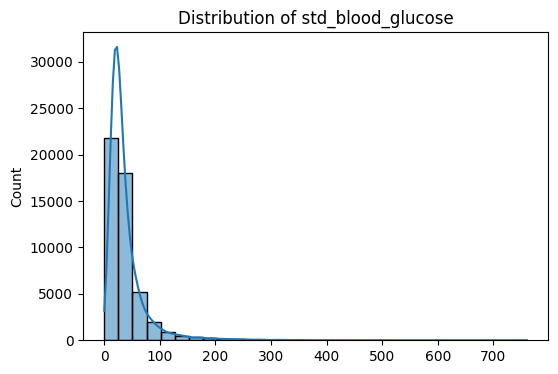

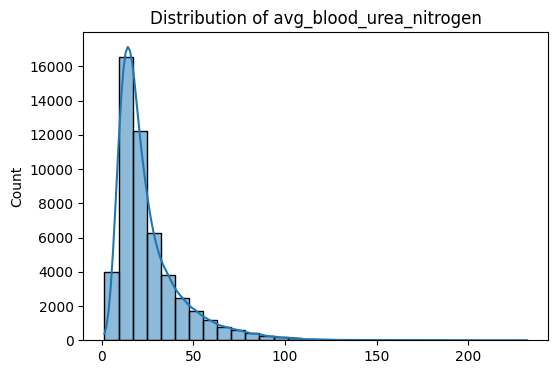

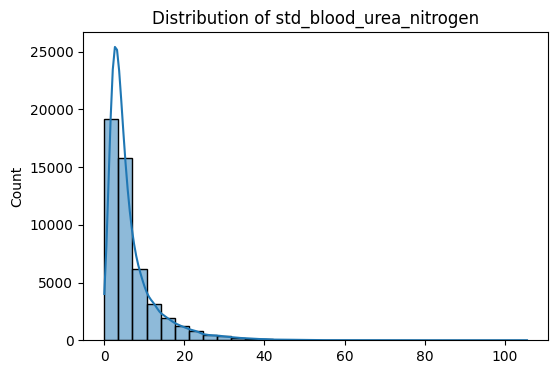

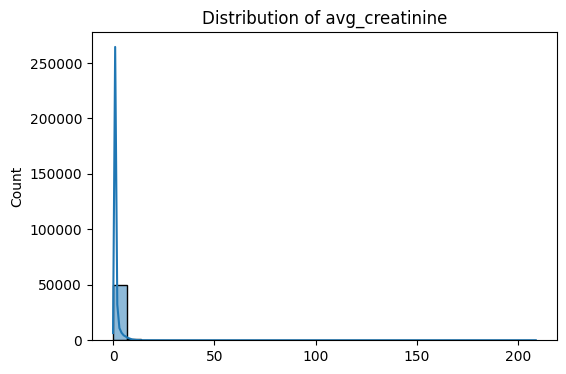

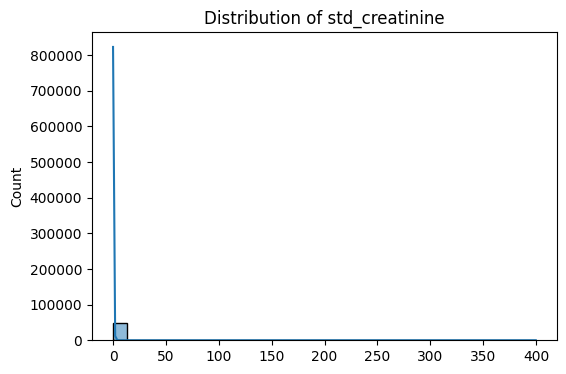

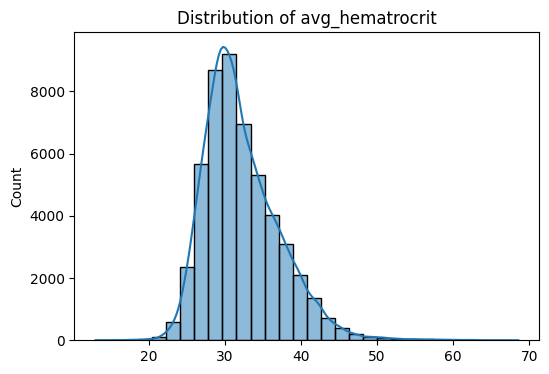

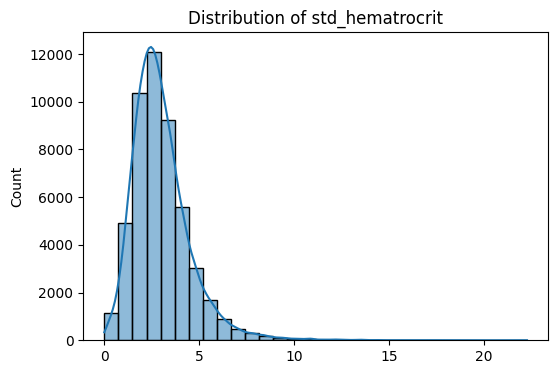

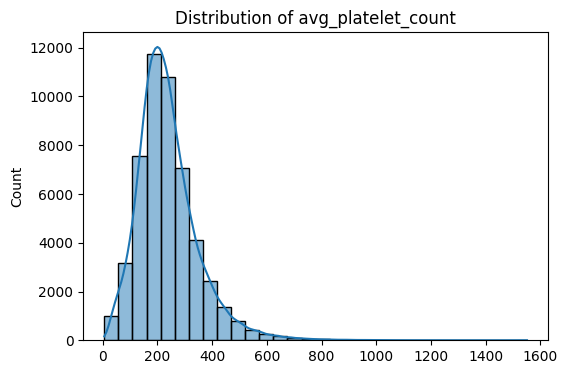

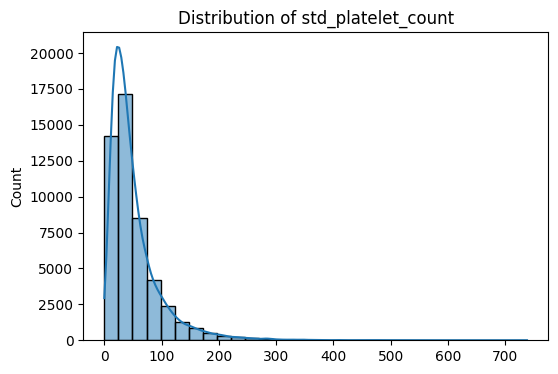

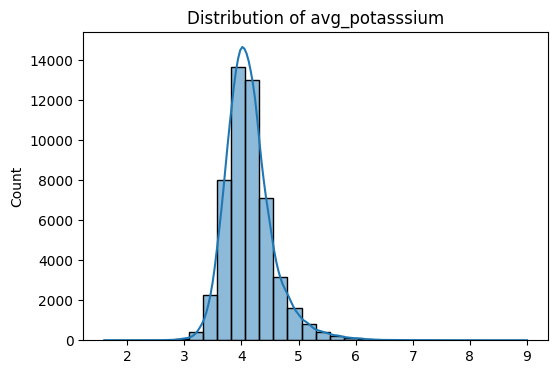

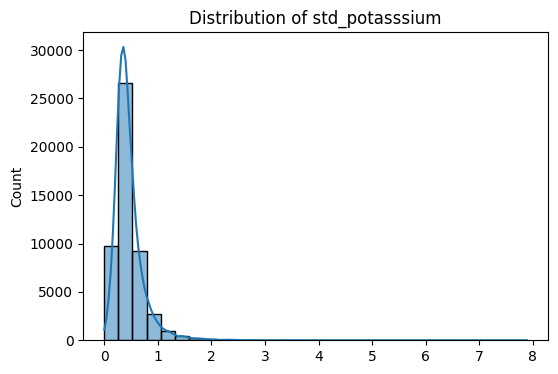

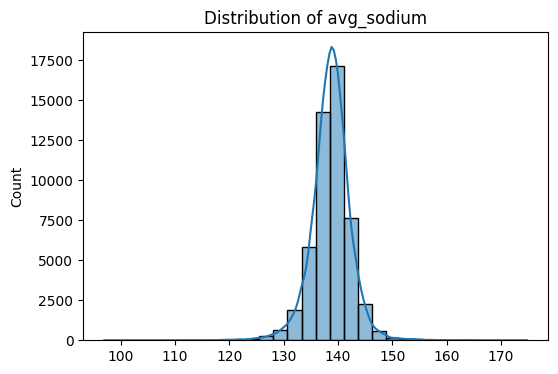

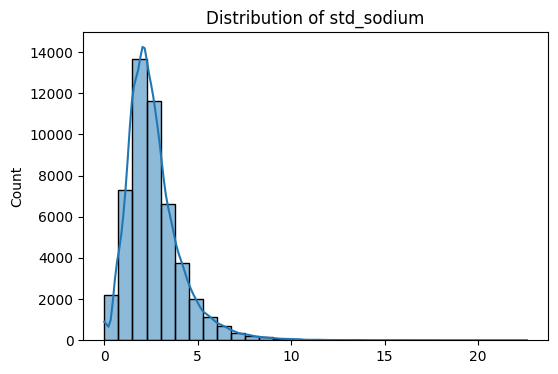

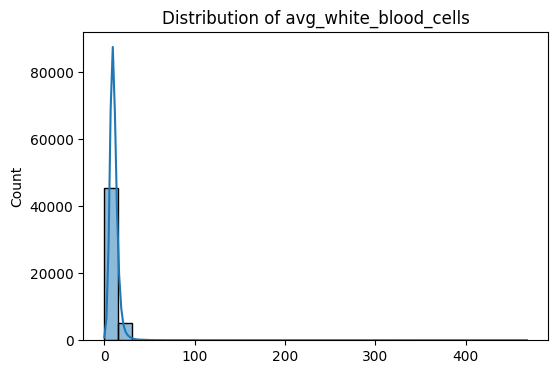

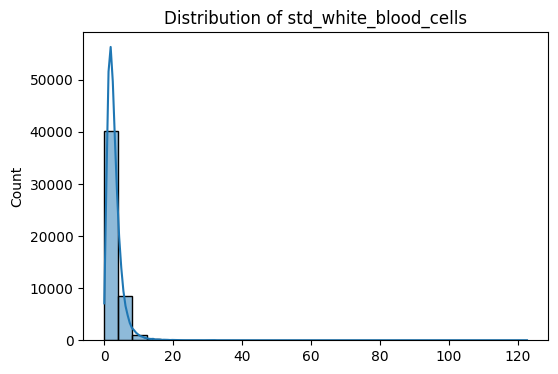

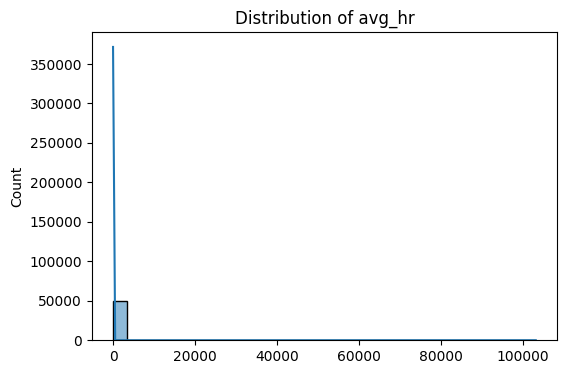

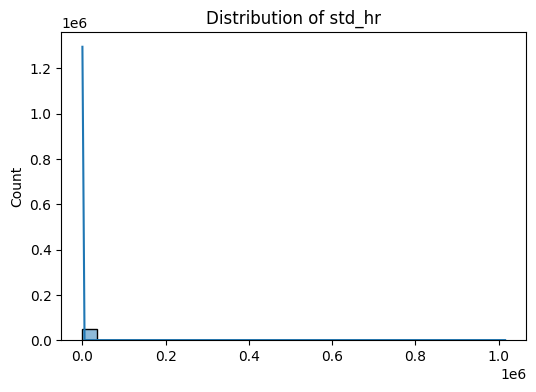

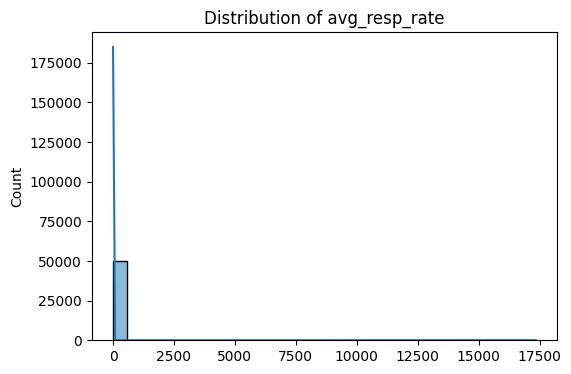

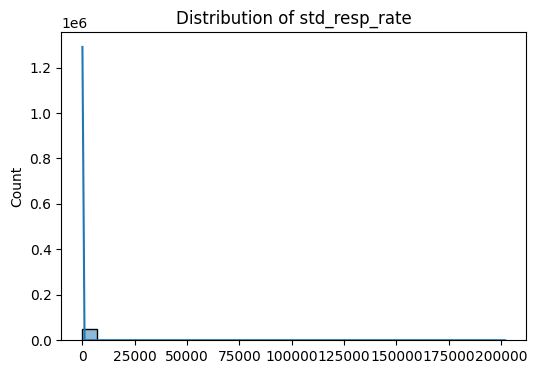

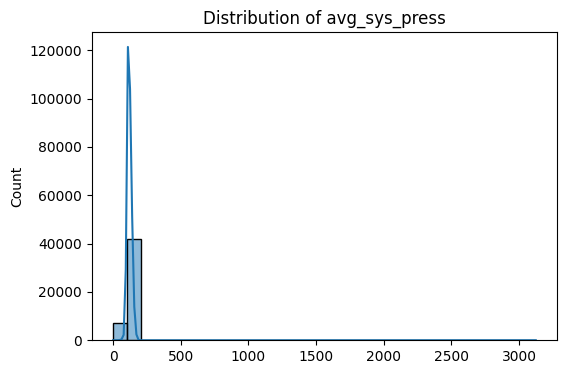

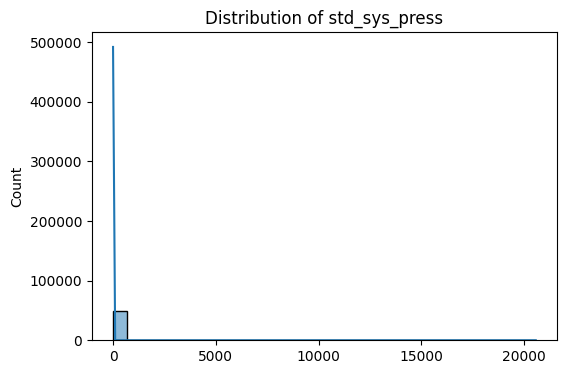

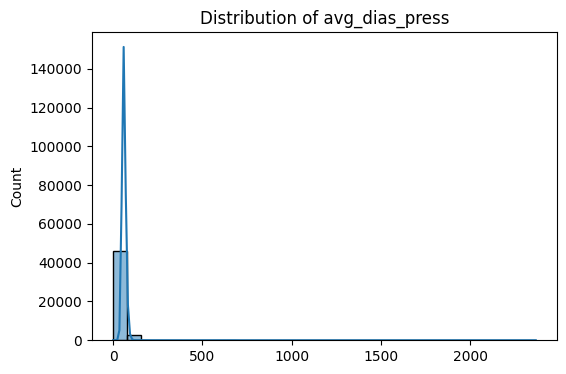

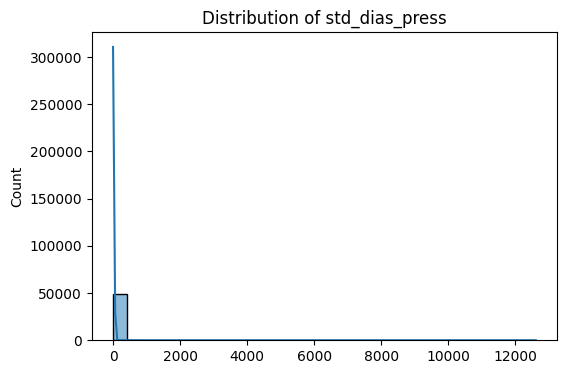

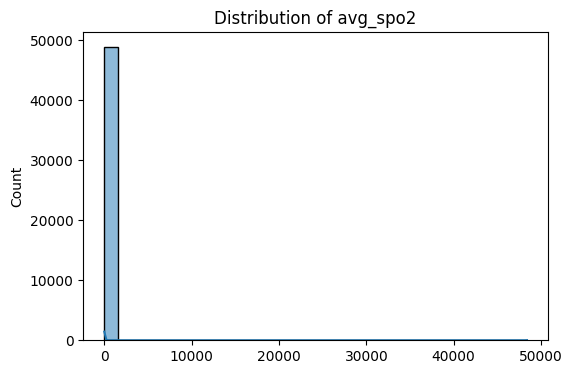

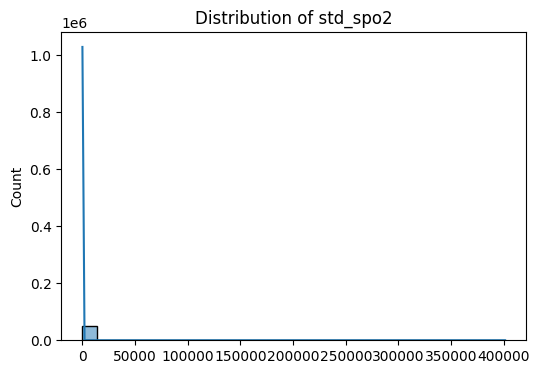

In [70]:
# To check the skewness of each numerical column

numerical_cols = final_patient_df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(final_patient_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Observation -**

i) Age column: We can see that most of the age group is between 40 and 80 and it has left skewed distribution.

ii) Columns such as std_sodium, std_potassium, std_platlet_count, std_bicarbonate etc have right skewed distribution (Positive skewed.)

Based on the above observation, we can see that most of the columns are either left-skewed or right skewed, so to impute values, we can use **median**.
Before doing this, we have to convert the categorical columns containing 'string[pyarrow]' to category data type

**MEDIAN IMPUTATION**

In [71]:
# categroize the category columns - Changing the data type of categorical columns from string[pyarrow] to category

categorical_columns = final_patient_df.select_dtypes(include=['string[pyarrow]']).columns.tolist()
final_patient_df = final_patient_df.categorize(columns=categorical_columns)

# Converting the remaining null values to median values
numerical_cols = final_patient_df.select_dtypes(include=['number']).columns
numerical_median = final_patient_df[numerical_cols].median()
final_patient_df = final_patient_df.fillna(numerical_median)
final_patient_df.compute()

,hadm_id,age,gender,marital_status,religion,ethnicity,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,...,avg_hr,std_hr,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,165315,64.971282,F,MARRIED,NONE,WHITE,27.500000,0.707107,105.000000,4.242641,...,101.875000,11.242034,20.000000,2.000000,141.538462,11.065076,74.307692,8.882423,98.125000,1.360147
1,152223,71.178910,M,MARRIED,CHRISTIAN,WHITE,24.000000,2.645751,116.846154,15.448010,...,90.139535,6.638923,17.714286,5.384194,101.340909,13.059690,56.613636,6.651511,97.906977,2.147135
2,124321,75.306343,M,MARRIED,CHRISTIAN,WHITE,27.250000,1.669046,134.600000,15.833860,...,76.694444,9.183275,17.114286,2.741526,122.180000,22.562105,64.860000,15.398131,98.114286,1.529541
3,161859,39.042949,M,SINGLE,CHRISTIAN,WHITE,24.000000,1.632993,117.000000,23.452079,...,67.923077,5.203549,15.076923,1.382120,122.937500,11.404495,74.625000,10.346497,98.538462,1.050031
4,129635,58.989281,M,MARRIED,NONE,WHITE,24.333333,2.500000,209.555556,104.623266,...,76.321839,9.592262,17.965116,4.564435,115.065934,24.737647,50.571429,10.242767,96.373494,2.341101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,191113,19.413381,F,SINGLE,NONE,WHITE,21.600000,4.669047,81.333333,14.137421,...,89.318182,16.415400,18.772727,2.893866,113.850000,12.465848,57.250000,9.175912,99.454545,1.503243
58972,101071,83.509132,F,WIDOWED,CHRISTIAN,WHITE,25.333333,2.509980,258.000000,27.804013,...,85.461538,4.611858,24.000000,3.439961,152.538462,11.132650,80.384615,6.331646,95.846154,1.951331
58973,122631,42.559732,M,MARRIED,NONE,WHITE,26.666667,2.943920,121.500000,11.351526,...,113.979167,6.883497,24.375000,6.058667,146.500000,16.244622,83.420000,9.028504,94.000000,2.259731
58974,170407,60.808503,F,MARRIED,CHRISTIAN,WHITE,24.923077,1.552500,131.071429,20.719609,...,84.406452,9.425300,18.757143,3.944309,118.818182,14.974290,60.069930,9.948697,97.190909,2.017570


**To check the Null percentage of Columns - to determine whether there are null values or not in columns**

In [72]:
column_null_percentage = (final_patient_df.isnull().sum() / len(final_patient_df)) * 100

# Finding Top 10
column_null_percentage.compute().sort_values(ascending=False).head(10)

,0
hadm_id,0.0
std_hr,0.0
std_potasssium,0.0
avg_sodium,0.0
std_sodium,0.0
avg_white_blood_cells,0.0
std_white_blood_cells,0.0
avg_hr,0.0
avg_resp_rate,0.0
age,0.0


In [73]:
# get category column values

category_df_check = final_patient_df.compute()
print(f'gender : {category_df_check["gender"].unique()}')
print(f'marital_status : {category_df_check["marital_status"].unique()}')
print(f'religion : {category_df_check["religion"].unique()}')
print(f'ethnicity : {category_df_check["ethnicity"].unique()}')

gender : ['F', 'M']
Categories (2, string): [F, M]
marital_status : ['MARRIED', 'SINGLE', 'UNKNOWN', 'DIVORCED/SEPARATED', 'WIDOWED']
Categories (5, string): [DIVORCED/SEPARATED, MARRIED, SINGLE, UNKNOWN, WIDOWED]
religion : ['NONE', 'CHRISTIAN', 'JEWISH/HEBREW', 'BUDDHIST/HINDU', 'ORTHODOX', 'MUSLIM']
Categories (6, string): [BUDDHIST/HINDU, CHRISTIAN, JEWISH/HEBREW, MUSLIM, NONE, ORTHODOX]
ethnicity : ['WHITE', 'NONE', 'OTHER', 'HISPANIC', 'BLACK', 'ASIAN']
Categories (6, string): [ASIAN, BLACK, HISPANIC, NONE, OTHER, WHITE]


We have 4 categorical columns - gender, marital_status, religion, ethnicity. Based on the information, the optimal approach is One-Hot encoding, but there is a caveat, the column have following values

a) Gender column has two values - M or F

b) Religion have 6 values - CHRISTIAN, JEWISH/HEBREW, MUSLIM, ORTHODOX, BUDDHIST/HINDU, NONE

c) Ethnicity have 6 values - ASIAN, BLACK, HISPANIC, OTHER, WHITE, NONE

d) Marital_status have 5 values - DIVORCED/SEPARATED, MARRIED, SINGLE, WIDOWED, UNKNOWN

Since we have 19 values in total from category columns, we will have more number of columns i.e. 19 columns extra, if we use One-hot encoding increasing our data. To avoid this, we used Label Encoding.

## STEP 5 : Label Encoding for Categorical Columns

In [74]:
# Dropping hadm_id column - it adds no value when it is used for normalization and clustering.
final_patient_df = final_patient_df.drop(['hadm_id'], axis=1)


categorical_cols = ["gender", "marital_status", "religion", "ethnicity"]

encoder = LabelEncoder()

for col in categorical_cols:
    final_patient_df[col] = encoder.fit_transform(final_patient_df[col])

final_patient_df.compute()

,age,gender,marital_status,religion,ethnicity,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,avg_blood_urea_nitrogen,...,avg_hr,std_hr,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,64.971282,0,1,4,5,27.500000,0.707107,105.000000,4.242641,13.000000,...,101.875000,11.242034,20.000000,2.000000,141.538462,11.065076,74.307692,8.882423,98.125000,1.360147
1,71.178910,1,1,1,5,24.000000,2.645751,116.846154,15.448010,17.250000,...,90.139535,6.638923,17.714286,5.384194,101.340909,13.059690,56.613636,6.651511,97.906977,2.147135
2,75.306343,1,1,1,5,27.250000,1.669046,134.600000,15.833860,18.375000,...,76.694444,9.183275,17.114286,2.741526,122.180000,22.562105,64.860000,15.398131,98.114286,1.529541
3,39.042949,1,2,1,5,24.000000,1.632993,117.000000,23.452079,11.500000,...,67.923077,5.203549,15.076923,1.382120,122.937500,11.404495,74.625000,10.346497,98.538462,1.050031
4,58.989281,1,1,4,5,24.333333,2.500000,209.555556,104.623266,39.555556,...,76.321839,9.592262,17.965116,4.564435,115.065934,24.737647,50.571429,10.242767,96.373494,2.341101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,19.413381,0,2,4,5,21.600000,4.669047,81.333333,14.137421,5.500000,...,89.318182,16.415400,18.772727,2.893866,113.850000,12.465848,57.250000,9.175912,99.454545,1.503243
58972,83.509132,0,4,1,5,25.333333,2.509980,258.000000,27.804013,20.000000,...,85.461538,4.611858,24.000000,3.439961,152.538462,11.132650,80.384615,6.331646,95.846154,1.951331
58973,42.559732,1,1,4,5,26.666667,2.943920,121.500000,11.351526,18.000000,...,113.979167,6.883497,24.375000,6.058667,146.500000,16.244622,83.420000,9.028504,94.000000,2.259731
58974,60.808503,0,1,1,5,24.923077,1.552500,131.071429,20.719609,7.857143,...,84.406452,9.425300,18.757143,3.944309,118.818182,14.974290,60.069930,9.948697,97.190909,2.017570


# STEP 6 - Treat outliers

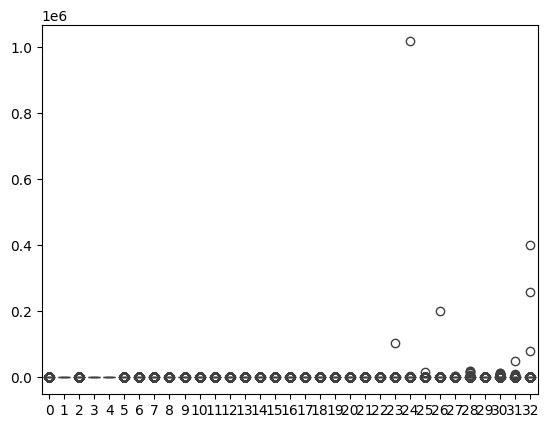

In [75]:
sns.boxplot(data=final_patient_df)
plt.show()

We can see some outlier in the above box-plot, lets remove them using Z-score approach. Z-score tells us how extreme a data point is compared to the rest of the dataset. The threshold is |Z| > 3 to detect outliers. We have used Z-score to remove the outliers

In [76]:
from scipy.stats import zscore
import numpy as np

final_patient_pd = final_patient_df.compute()

# Compute Z-scores
z_scores = np.abs(zscore(final_patient_pd))

# Remove outliers based on Z-score threshold
final_patient_pd = final_patient_pd[(z_scores < 3).all(axis=1)]

final_patient_pd = DaskDD.from_pandas(final_patient_pd, npartitions=None)


Check outliers

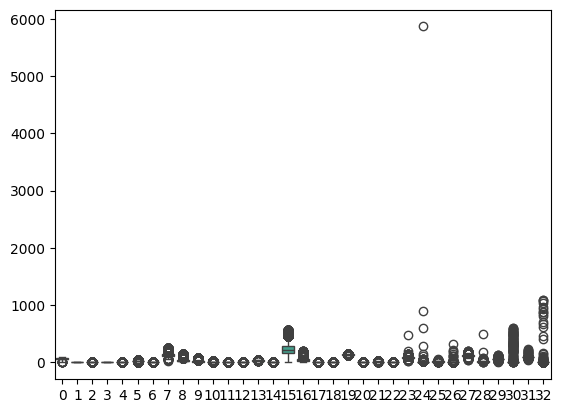

In [77]:
sns.boxplot(data=final_patient_pd)
plt.show()

Now we can see most of the outliers are eliminated, so we can proceed towards Normalizing the dataframe before using Clustering techniques.

## Step 7 : Normalization of all rows

For Normalization, we decided to drop hadm_id because it is an identifier and does not have a meaningful numerical scale. After dropping ‘hadm_id’, we can perform MinMaxScalar to normalize the data into [0,1].

In [78]:
import pandas as pd

patient_ddf_norm = final_patient_pd

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Min Max scaling code
patient_ddf_norm = patient_ddf_norm.map_partitions(lambda pdf: pd.DataFrame(scaler.fit_transform(pdf), columns=pdf.columns))

patient_ddf_norm.compute()



,age,gender,marital_status,religion,ethnicity,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,avg_blood_urea_nitrogen,...,avg_hr,std_hr,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,0.654432,0.0,0.25,0.8,1.0,0.595402,0.107208,0.337327,0.028033,0.147797,...,0.158249,0.001916,0.240705,0.006106,0.631051,0.022155,0.507623,0.014592,0.285181,0.001243
1,0.735599,1.0,0.25,0.2,1.0,0.445211,0.401136,0.390255,0.102071,0.202045,...,0.132441,0.001132,0.199234,0.016437,0.367149,0.026149,0.358688,0.010927,0.283985,0.001962
2,0.789568,1.0,0.25,0.2,1.0,0.584674,0.253052,0.469578,0.104620,0.216405,...,0.102873,0.001565,0.188347,0.008369,0.503960,0.045176,0.428100,0.025296,0.285123,0.001397
3,0.315406,1.0,0.50,0.2,1.0,0.445211,0.247586,0.390942,0.154956,0.128650,...,0.083583,0.000887,0.151382,0.004219,0.508933,0.022835,0.510294,0.016997,0.287450,0.000959
4,0.576214,1.0,0.25,0.8,1.0,0.459515,0.379038,0.804472,0.691283,0.486759,...,0.102053,0.001635,0.203785,0.013934,0.457256,0.049532,0.307830,0.016826,0.275572,0.002139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41077,0.956218,1.0,1.00,0.2,1.0,0.573946,0.428832,0.492215,0.238994,0.169071,...,0.107047,0.001863,0.281024,0.017523,0.509081,0.047208,0.382478,0.027847,0.281651,0.007649
41078,0.058740,0.0,0.50,0.8,1.0,0.342222,0.707898,0.231587,0.093411,0.052065,...,0.130634,0.002798,0.218437,0.008834,0.449273,0.024960,0.364045,0.015074,0.292476,0.001373
41079,0.361390,1.0,0.25,0.8,1.0,0.559642,0.446343,0.411048,0.075004,0.211618,...,0.184868,0.001173,0.320083,0.018496,0.663624,0.032526,0.584323,0.014832,0.262551,0.002064
41080,0.600001,0.0,0.25,0.2,1.0,0.484822,0.235382,0.453812,0.136902,0.082152,...,0.119833,0.001607,0.218155,0.012041,0.481890,0.029983,0.387781,0.016343,0.280057,0.001843


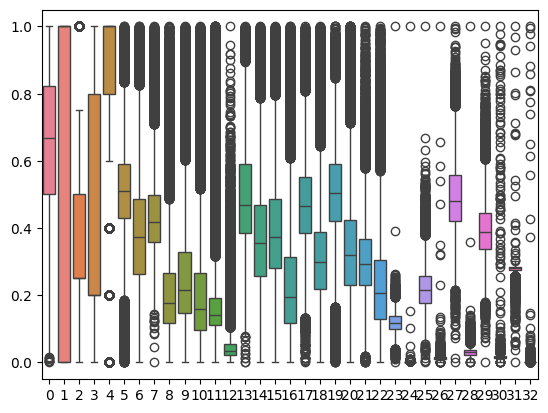

In [79]:
sns.boxplot(data=patient_ddf_norm)
plt.show()

Now the data is normalized and completely ready for Clustering

## Step 8 : CLUSTERING

### i) K Means Clustering

In [81]:
# Compute Dask Dataframe

patient_ddf_norm.compute()

,age,gender,marital_status,religion,ethnicity,avg_bicarbonate,std_bicarbonate,avg_blood_glucose,std_blood_glucose,avg_blood_urea_nitrogen,...,avg_hr,std_hr,avg_resp_rate,std_resp_rate,avg_sys_press,std_sys_press,avg_dias_press,std_dias_press,avg_spo2,std_spo2
0,0.654432,0.0,0.25,0.8,1.0,0.595402,0.107208,0.337327,0.028033,0.147797,...,0.158249,0.001916,0.240705,0.006106,0.631051,0.022155,0.507623,0.014592,0.285181,0.001243
1,0.735599,1.0,0.25,0.2,1.0,0.445211,0.401136,0.390255,0.102071,0.202045,...,0.132441,0.001132,0.199234,0.016437,0.367149,0.026149,0.358688,0.010927,0.283985,0.001962
2,0.789568,1.0,0.25,0.2,1.0,0.584674,0.253052,0.469578,0.104620,0.216405,...,0.102873,0.001565,0.188347,0.008369,0.503960,0.045176,0.428100,0.025296,0.285123,0.001397
3,0.315406,1.0,0.50,0.2,1.0,0.445211,0.247586,0.390942,0.154956,0.128650,...,0.083583,0.000887,0.151382,0.004219,0.508933,0.022835,0.510294,0.016997,0.287450,0.000959
4,0.576214,1.0,0.25,0.8,1.0,0.459515,0.379038,0.804472,0.691283,0.486759,...,0.102053,0.001635,0.203785,0.013934,0.457256,0.049532,0.307830,0.016826,0.275572,0.002139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41077,0.956218,1.0,1.00,0.2,1.0,0.573946,0.428832,0.492215,0.238994,0.169071,...,0.107047,0.001863,0.281024,0.017523,0.509081,0.047208,0.382478,0.027847,0.281651,0.007649
41078,0.058740,0.0,0.50,0.8,1.0,0.342222,0.707898,0.231587,0.093411,0.052065,...,0.130634,0.002798,0.218437,0.008834,0.449273,0.024960,0.364045,0.015074,0.292476,0.001373
41079,0.361390,1.0,0.25,0.8,1.0,0.559642,0.446343,0.411048,0.075004,0.211618,...,0.184868,0.001173,0.320083,0.018496,0.663624,0.032526,0.584323,0.014832,0.262551,0.002064
41080,0.600001,0.0,0.25,0.2,1.0,0.484822,0.235382,0.453812,0.136902,0.082152,...,0.119833,0.001607,0.218155,0.012041,0.481890,0.029983,0.387781,0.016343,0.280057,0.001843


This is the cleaned data which contains 41082 rows and 33 columns to be used for clustering.

### ELBOW METHOD to find optimal K

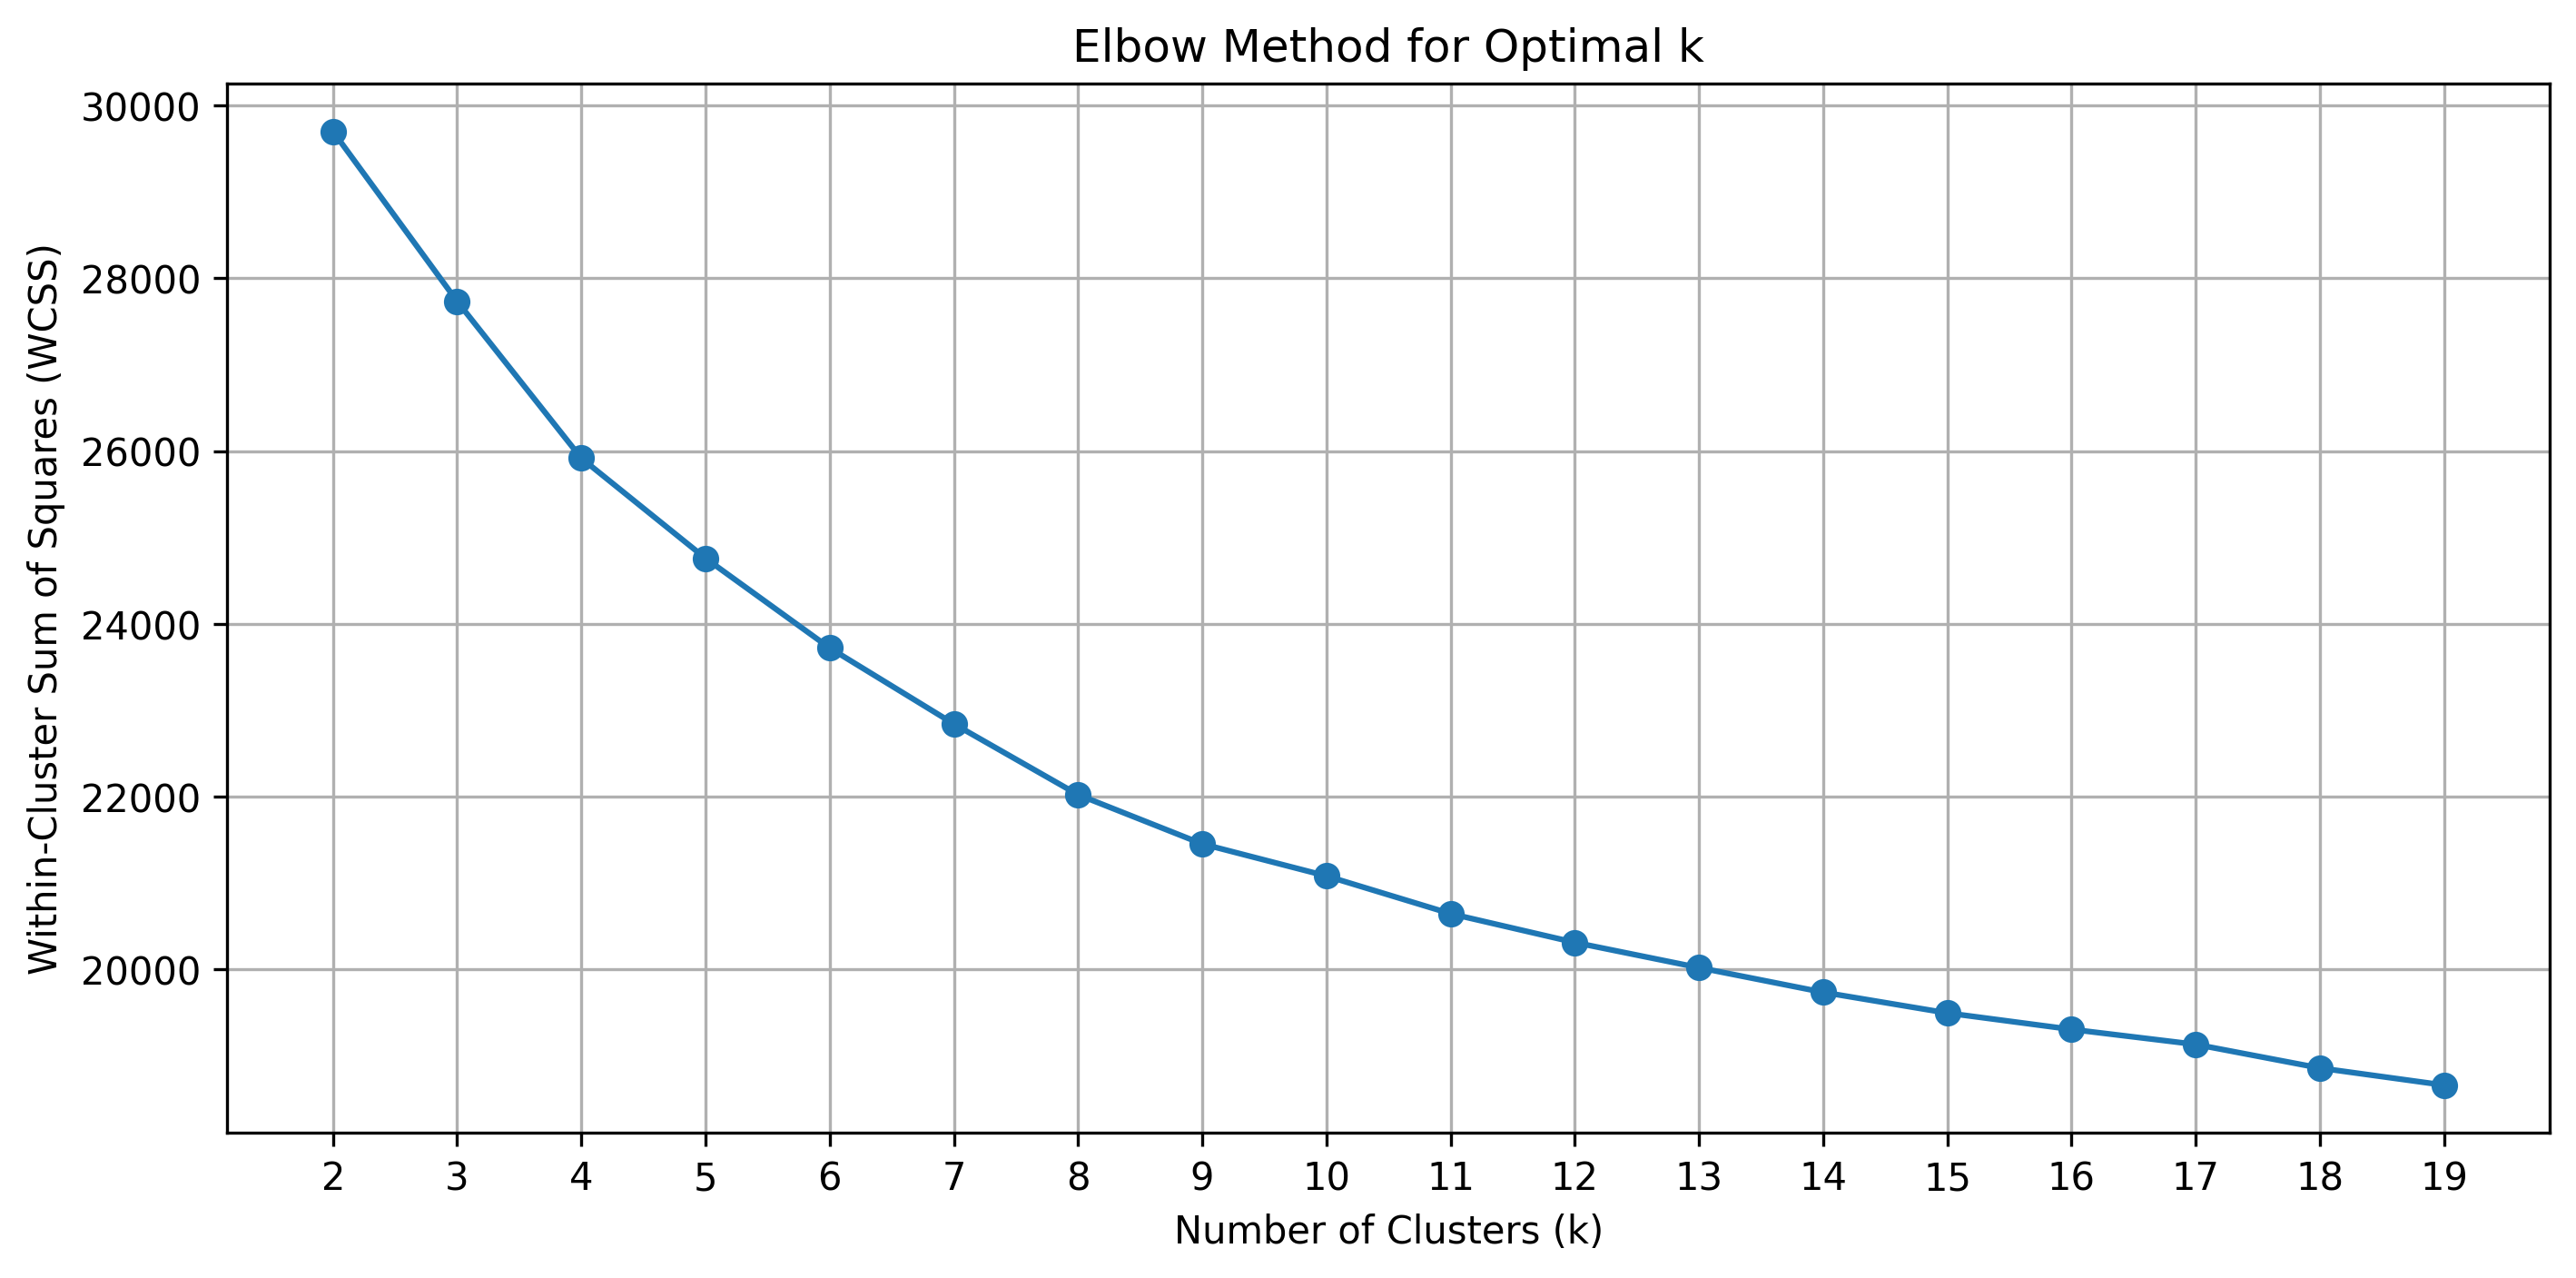

In [102]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

# Calculate WCSS for k values from 2 to 10
wcss = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1000, n_init=10)
    kmeans.fit(patient_ddf_norm)
    wcss.append(kmeans.inertia_)

# Plot the WCSS scores
plt.figure(figsize=(11, 5), dpi=300)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Optimal Value of K is 4

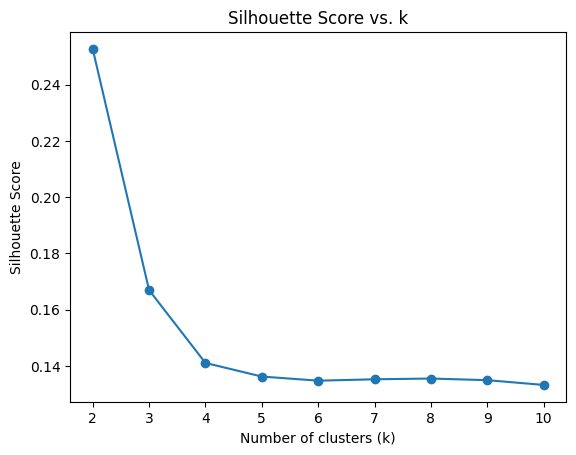

In [83]:
# Calculate Silhoutte Scores for K=2 to K=10
silhouette_scores = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, random_state=42)
 kmeans.fit(patient_ddf_norm)
 score = silhouette_score(patient_ddf_norm, kmeans.labels_)
 silhouette_scores.append(score)

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.show()


Optimal Value of K is 2

Scatter plot of K-means for Age and avg_dias_press

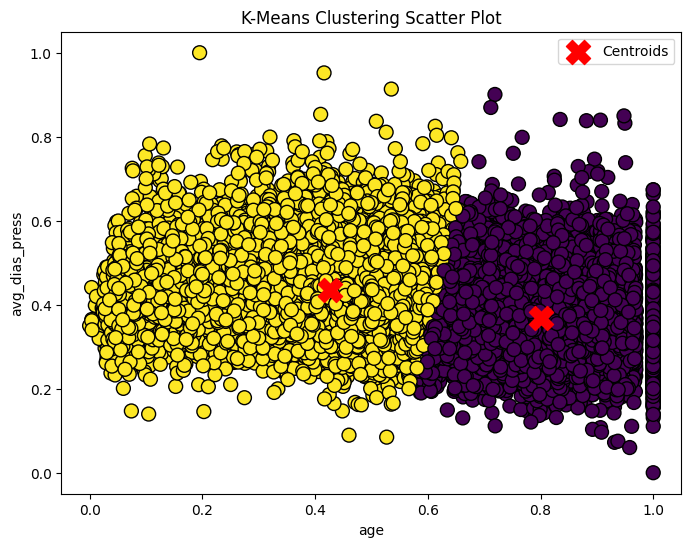

In [104]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

analysis_df = patient_ddf_norm.compute()

age = 'age'
avg_dias_press = 'avg_dias_press'
X = analysis_df[[age, avg_dias_press]].values

# Apply K-Means Clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
analysis_df['cluster'] = kmeans.fit_predict(X)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(analysis_df[age], analysis_df[avg_dias_press], c=analysis_df['cluster'], cmap='viridis', edgecolor='k', s=100)

# Plot Cluster Centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=300, label='Centroids')

plt.xlabel(age)
plt.ylabel(avg_dias_press)
plt.title('K-Means Clustering Scatter Plot')
plt.legend()
plt.show()

We can see that, based on K=2, the data is getting clustered into two different clusters. They are being assigned with different clusters. But due to low silhouette score, some data is still spread out even if they belong to same cluster.

Similarly, We checked the Scatter plot of K-means for Age and avg_blood_urea_nitrogen

I feel it is clustering based Age such as young people and old people based on avg_blood_urea_nitrogen


Scatter plot of K-means for std_creatinine and avg_creatinine

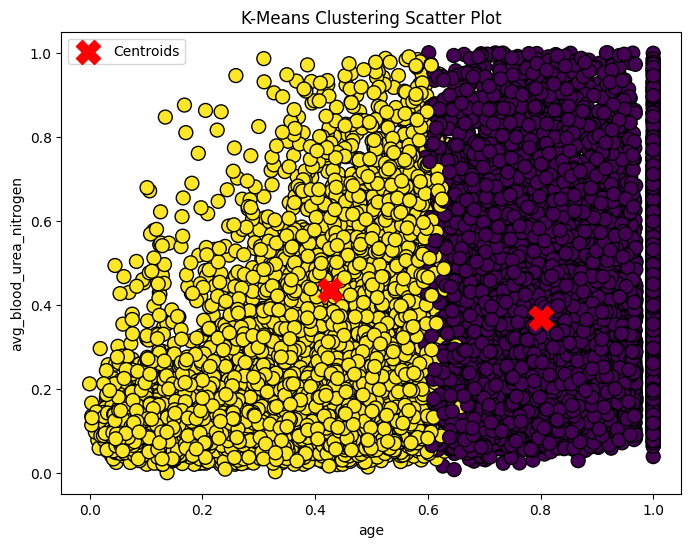

In [115]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

analysis_df = patient_ddf_norm.compute()

age = 'age'
avg_blood_urea_nitrogen  = 'avg_blood_urea_nitrogen'
X = analysis_df[[age, avg_dias_press]].values

# Apply K-Means Clustering
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
analysis_df['cluster'] = kmeans.fit_predict(X)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(analysis_df[age], analysis_df[avg_blood_urea_nitrogen], c=analysis_df['cluster'], cmap='viridis', edgecolor='k', s=100)

# Plot Cluster Centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=300, label='Centroids')

plt.xlabel(age)
plt.ylabel(avg_blood_urea_nitrogen)
plt.title('K-Means Clustering Scatter Plot')
plt.legend()
plt.show()

The clusters are taking place as their correlation is better as checked in the heatmap and since K=2, the data is getting clustered properly.

Based on the above observation , Age (Demographic) is getting well clustered with avg_blood_urea_nitrogen (lab test) and avg_dias_press (vital sign).
I feel it is clustering based Age such as young people and old people based on avg_dias_press

Only these are getting clustered as there is a positive correlation between age and std_blood_urea_nitrogen which is around 0.35 and negative correlation between age and avg_dias_press which is around 0.36.


PCA Implementation for clustering (To check for clustering )

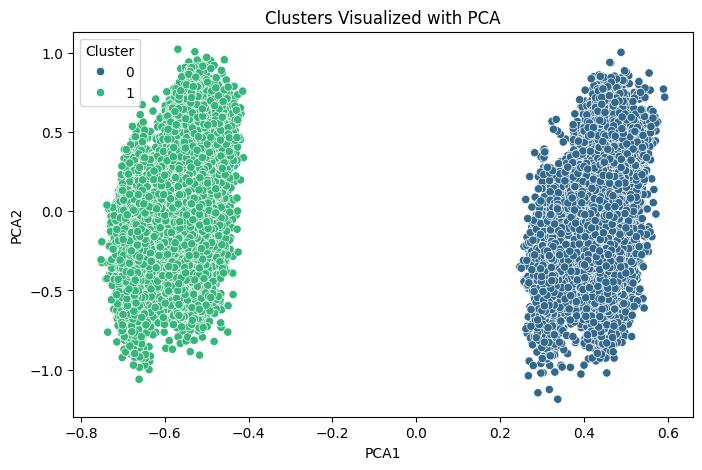

              age  gender  marital_status  religion  ethnicity  \
Cluster                                                          
0        0.630154     1.0        0.371904  0.464382   0.855297   
1        0.666986     0.0        0.494511  0.427673   0.828944   

         avg_bicarbonate  std_bicarbonate  avg_blood_glucose  \
Cluster                                                        
0               0.513022         0.377187           0.444051   
1               0.507777         0.400668           0.441541   

         std_blood_glucose  avg_blood_urea_nitrogen  ...  avg_resp_rate  \
Cluster                                              ...                  
0                 0.209342                 0.276537  ...       0.219821   
1                 0.222053                 0.250291  ...       0.223267   

         std_resp_rate  avg_sys_press  std_sys_press  avg_dias_press  \
Cluster                                                                
0             0.012839       0.49

In [110]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choosing optimal k (modify as needed based on the elbow plot)
hc_dask_df = patient_ddf_norm.compute()

optimal_k = 2  # Example choice based on the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=675, n_init=10)
hc_dask_df['Cluster'] = kmeans.fit_predict(hc_dask_df)

# Visualizing clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(patient_ddf_norm)
hc_dask_df['PCA1'] = data_pca[:, 0]
hc_dask_df['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=hc_dask_df, palette='viridis')
plt.title('Clusters Visualized with PCA')
plt.show()

# Analyzing cluster characteristics
cluster_summary = hc_dask_df.groupby('Cluster').mean()
print(cluster_summary)

# Compute Silhouette Score
score = silhouette_score(hc_dask_df.drop(columns=['Cluster']), hc_dask_df['Cluster'])
print(f'Silhouette Score: {score}')

3D representation of PCA

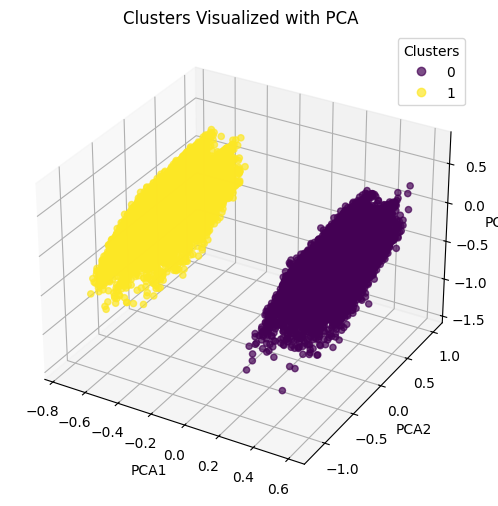

              age  gender  marital_status  religion  ethnicity  \
Cluster                                                          
0        0.630154     1.0        0.371904  0.464382   0.855297   
1        0.666986     0.0        0.494511  0.427673   0.828944   

         avg_bicarbonate  std_bicarbonate  avg_blood_glucose  \
Cluster                                                        
0               0.513022         0.377187           0.444051   
1               0.507777         0.400668           0.441541   

         std_blood_glucose  avg_blood_urea_nitrogen  ...    avg_hr    std_hr  \
Cluster                                              ...                       
0                 0.209342                 0.276537  ...  0.117865  0.001752   
1                 0.222053                 0.250291  ...  0.120551  0.001746   

         avg_resp_rate  std_resp_rate  avg_sys_press  std_sys_press  \
Cluster                                                               
0             0

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Compute the Dask dataframe into Pandas dataframe
hc_dask_df = patient_ddf_norm.compute()

# Choosing optimal k (modify as needed based on the elbow plot)
optimal_k = 2  # Example choice based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=675, n_init=10)
hc_dask_df['Cluster'] = kmeans.fit_predict(hc_dask_df)

# Apply PCA (Fixing the incorrect Dask transformation)
pca = PCA(n_components=3)  # Keeping it 3D for visualization
data_pca = pca.fit_transform(hc_dask_df.drop(columns=['Cluster']))  # Ensure no cluster column in PCA input

# Convert to DataFrame for better handling
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = hc_dask_df['Cluster'].values  # Assign clusters back

# 3D Visualization using Matplotlib
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('Clusters Visualized with PCA')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Analyzing cluster characteristics
cluster_summary = hc_dask_df.groupby('Cluster').mean()
print(cluster_summary)

# Compute Silhouette Score (Fix: Use original features, not PCA-transformed data)
score = silhouette_score(hc_dask_df.drop(columns=['Cluster']), hc_dask_df['Cluster'])
print(f'Silhouette Score: {score}')


### II) Hierarchal Clustering

a) Ward Linkage method

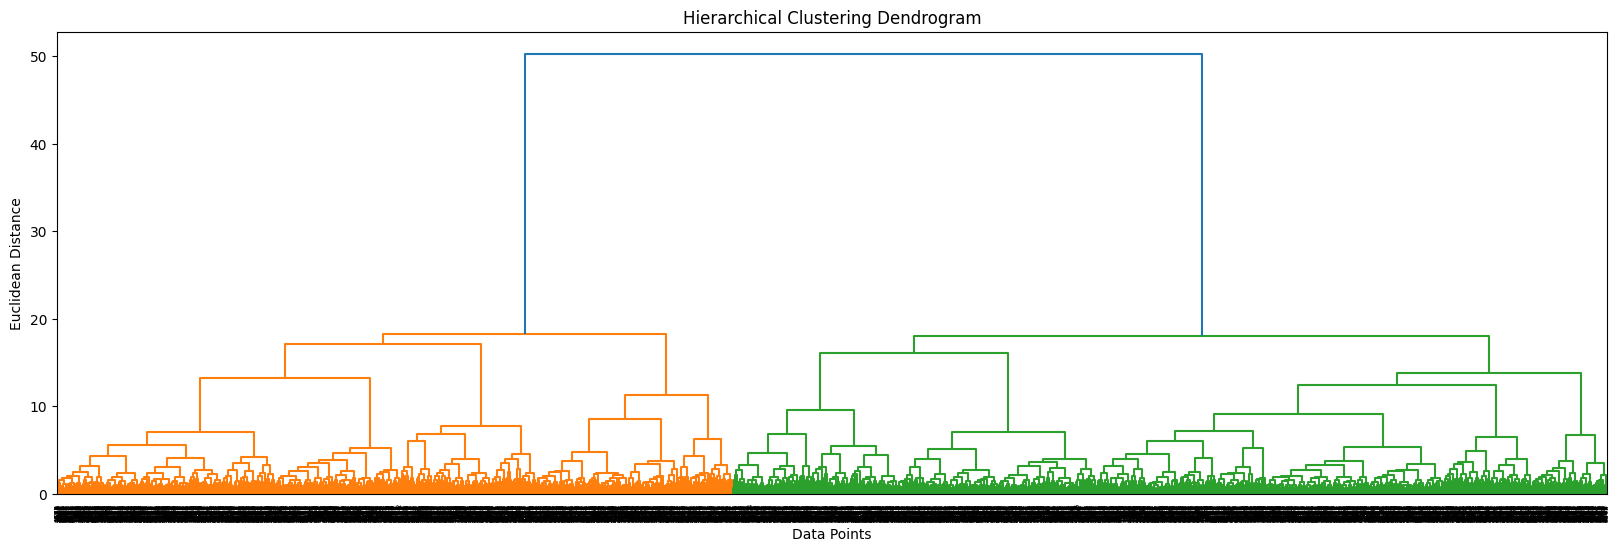

In [87]:
import dask.dataframe as dd
import dask.array as da
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

df_dask_array = patient_ddf_norm.to_dask_array(lengths=True)

# random data of 5000 rows
sample_size = 5000
df_sample = df_dask_array[da.random.choice(df_dask_array.shape[0], sample_size, replace=False)]

df_sample_np = df_sample.compute()

# Perform Ward hierarchical clustering
linked1 = linkage(df_sample_np, method='ward')

# Plot dendrogram
plt.figure(figsize=(20, 6))
dendrogram(linked1, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


b) Complete Linkage method

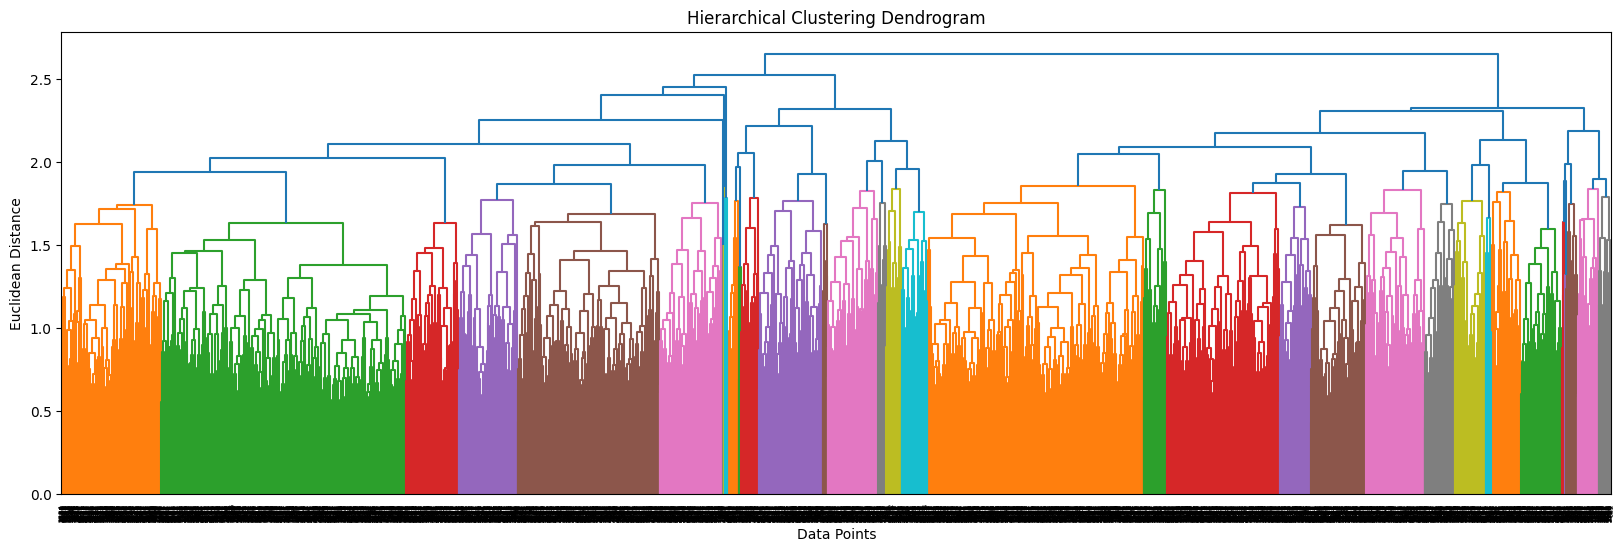

In [88]:
import dask.dataframe as dd
import dask.array as da
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt


df_dask_array = patient_ddf_norm.to_dask_array(lengths=True)

# random data of 5000 rows
sample_size = 5000
df_sample = df_dask_array[da.random.choice(df_dask_array.shape[0], sample_size, replace=False)]

df_sample_np = df_sample.compute()

# Perform complete hierarchical clustering
linked2 = linkage(df_sample_np, method='complete')

# Plot dendrogram
plt.figure(figsize=(20, 6))
dendrogram(linked2, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


c) Average Linkage method

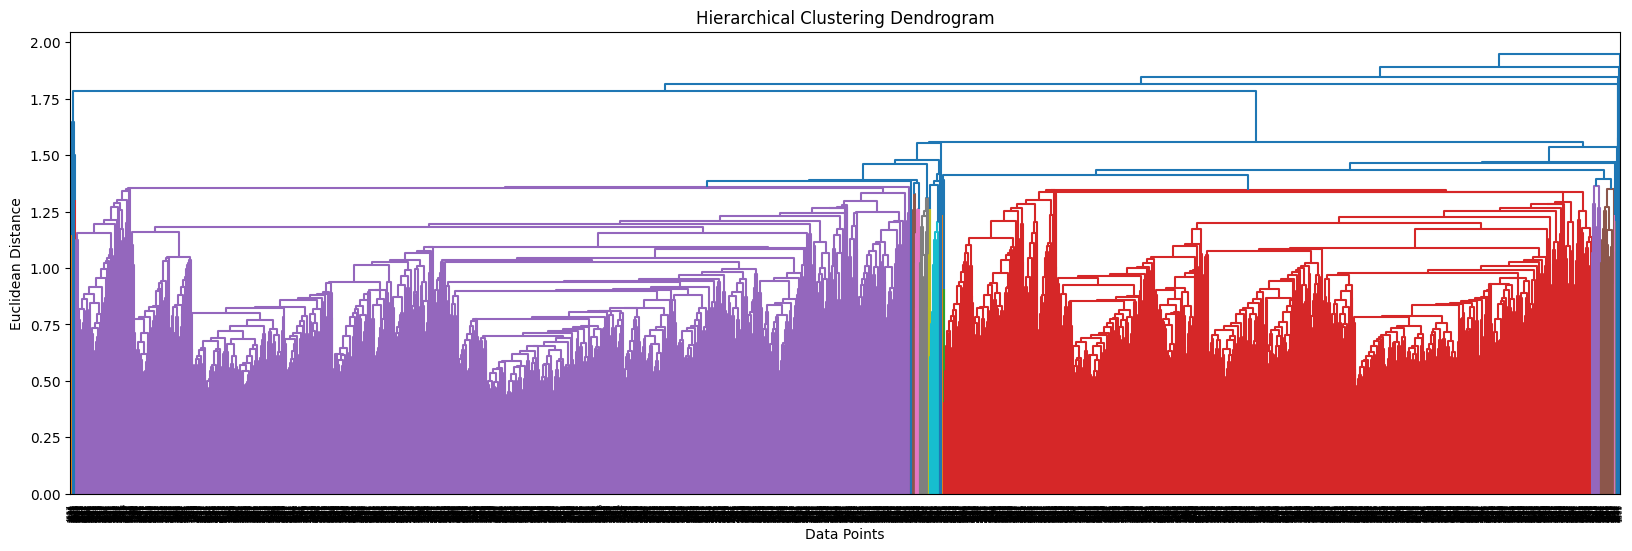

In [89]:
import dask.dataframe as dd
import dask.array as da
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Assume `patient_ddf_norm` is a Dask DataFrame containing normalized data

# Convert Dask DataFrame to Dask Array
df_dask_array = patient_ddf_norm.to_dask_array(lengths=True)

# Sample a subset of the data for hierarchical clustering
sample_size = 5000  # Adjust based on memory constraints
df_sample = df_dask_array[da.random.choice(df_dask_array.shape[0], sample_size, replace=False)]

# Compute the sample in-memory (convert to NumPy array)
df_sample_np = df_sample.compute()

# Perform hierarchical clustering
linked3 = linkage(df_sample_np, method='average')

# Plot dendrogram
plt.figure(figsize=(20, 6))
dendrogram(linked3, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


# Heatmap

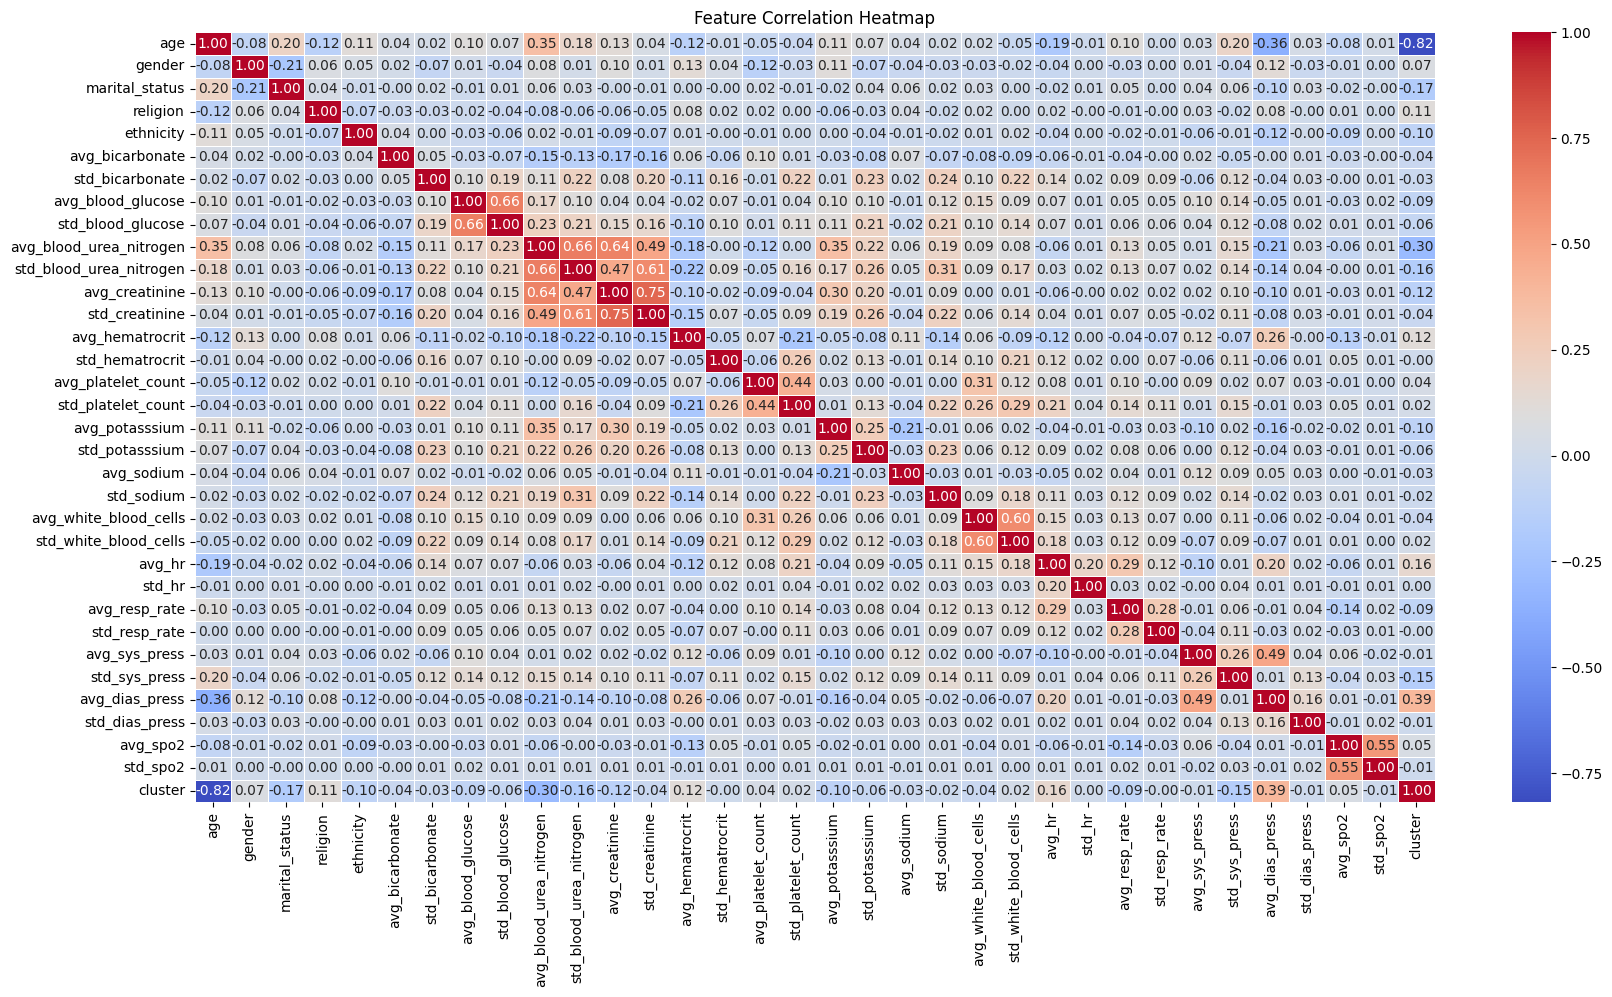

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = analysis_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


OBSERVATION -

i) There is a positive correlation between age and std_blood_urea_nitrogen which is around 0.35 and negative correlation between age and avg_dias_press which is around 0.36.

ii) There is a positive correlation between std_creatinine and avg_creatinine.
